In [ ]:
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as nm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
endo_data=pd.read_csv('/content/endodata.csv')

In [ ]:
endo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           198 non-null    float64
 1   AGE                  198 non-null    object 
 2   HEIGHT               198 non-null    object 
 3   WEIGHT               198 non-null    object 
 4   OCPBG                198 non-null    object 
 5   JOBSAT               198 non-null    float64
 6   IRRSLEEPCYC          198 non-null    object 
 7   SLEEP6.5+            198 non-null    object 
 8   IRRDIET              198 non-null    object 
 9   LIFESTYLE            198 non-null    object 
 10  DIETINTAKE           198 non-null    object 
 11  AVGMEAL              198 non-null    float64
 12  FAMHISTPCOS          198 non-null    object 
 13  FAMHISTDBTS          198 non-null    object 
 14  FAMHISTOBS           198 non-null    object 
 15  SANPRODFREQ          198 non-null    f

In [ ]:
from sklearn.preprocessing import LabelEncoder
endo_encoded = endo_data.copy()

label_encoder = LabelEncoder()

for col in endo_encoded.columns:
    if endo_encoded[col].dtype == 'object':
        endo_encoded[col] = label_encoder.fit_transform(endo_encoded[col])

In [ ]:
endo_data.drop(columns=[f'{endo_data.columns[0]}'],inplace=True)

In [ ]:
endo_encoded.dropna(inplace=True)

In [ ]:
endo_encoded.head()

,Unnamed: 0,AGE,HEIGHT,WEIGHT,OCPBG,JOBSAT,IRRSLEEPCYC,SLEEP6.5+,IRRDIET,LIFESTYLE,...,FOULSMELLURINE,PAINDURINGURINATION,NAUSDURINGURN,REGSELFCHECKS,MNTLHLTHSCORE,MENTALILL,MENOPAUSE,IRRIBOWEL,VESREFLUX,ENDOYES
0,0.0,3,2,3,7,7.0,1,1,1,1,...,0,0,0,1,7.0,0,0,0,0,0
1,1.0,3,2,3,7,9.0,0,1,1,1,...,0,0,0,0,7.0,0,0,0,0,0
2,2.0,3,3,3,7,8.0,1,0,1,1,...,0,0,0,0,7.0,0,0,0,0,0
3,3.0,3,3,3,7,7.0,1,1,1,0,...,0,0,0,1,8.0,0,0,0,0,0
4,4.0,3,2,1,7,9.0,1,1,0,0,...,0,0,0,1,9.0,0,0,0,0,0


# Standard scaling and PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(endo_encoded)

array([[-1.72332506,  0.65910342, -0.44566881, ..., -0.20519567,
        -0.12403473, -0.38014296],
       [-1.70582937,  0.65910342, -0.44566881, ..., -0.20519567,
        -0.12403473, -0.38014296],
       [-1.68833368,  0.65910342,  0.77992042, ..., -0.20519567,
        -0.12403473, -0.38014296],
       ...,
       [ 1.68833368, -0.2934694 , -0.44566881, ..., -0.20519567,
        -0.12403473,  2.63058929],
       [ 1.70582937, -0.2934694 , -0.44566881, ..., -0.20519567,
        -0.12403473,  2.63058929],
       [ 1.72332506, -1.24604222, -0.44566881, ..., -0.20519567,
        -0.12403473,  2.63058929]])

In [ ]:
scaled_data=scaler.transform(endo_encoded)

In [ ]:
scaled_data

array([[-1.72332506,  0.65910342, -0.44566881, ..., -0.20519567,
        -0.12403473, -0.38014296],
       [-1.70582937,  0.65910342, -0.44566881, ..., -0.20519567,
        -0.12403473, -0.38014296],
       [-1.68833368,  0.65910342,  0.77992042, ..., -0.20519567,
        -0.12403473, -0.38014296],
       ...,
       [ 1.68833368, -0.2934694 , -0.44566881, ..., -0.20519567,
        -0.12403473,  2.63058929],
       [ 1.70582937, -0.2934694 , -0.44566881, ..., -0.20519567,
        -0.12403473,  2.63058929],
       [ 1.72332506, -1.24604222, -0.44566881, ..., -0.20519567,
        -0.12403473,  2.63058929]])

In [ ]:
endo_encoded = endo_encoded.drop(columns=[
    'Unnamed: 0'])

In [ ]:
print(endo_encoded.shape[1])

34


In [ ]:
pca=PCA(n_components=15)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=15)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
x_pca

array([[ 1.7575979 ,  0.14162012, -0.6549425 , ..., -0.02130349,
        -1.27217428,  0.25404295],
       [ 1.5096286 , -0.6954996 , -1.45272024, ..., -1.02574817,
        -1.14147509,  0.29081102],
       [ 2.25267908,  1.80580147,  0.80303804, ...,  0.12488948,
         2.78907006,  0.07239119],
       ...,
       [-2.20524249,  1.50697985,  0.38965479, ...,  1.07091271,
        -0.19053719,  0.81121239],
       [-2.631517  ,  1.43518123,  0.26246153, ...,  0.67525341,
        -0.81979082,  0.5724318 ],
       [-3.41606052,  1.84395661, -0.72675711, ..., -0.96163482,
         0.78995622,  0.00855621]])

# Oversampling

In [ ]:
! pip install -U imbalanced-learn

In [ ]:
y=endo_encoded['ENDOYES']

In [ ]:
y.value_counts()


0    173
1     25
Name: ENDOYES, dtype: int64

<Axes: ylabel='ENDOYES'>

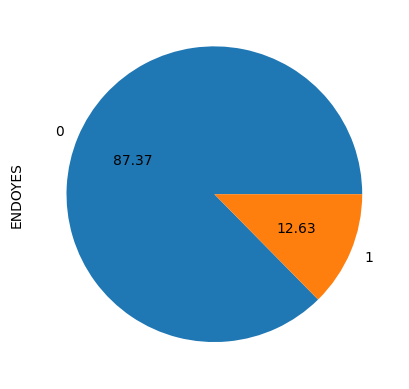

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the target variable 'y'
y_encoded = label_encoder.fit_transform(y)

# Display the mapping of original categories to encoded values
print("Mapping of categories to encoded values:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

# Display the encoded target variable
print("Encoded target variable:")
print(y_encoded)

Mapping of categories to encoded values:
0: 0
1: 1
Encoded target variable:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'X_pca' and 'y' are your PCA-transformed feature matrix and target vector
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_pca, y_encoded)


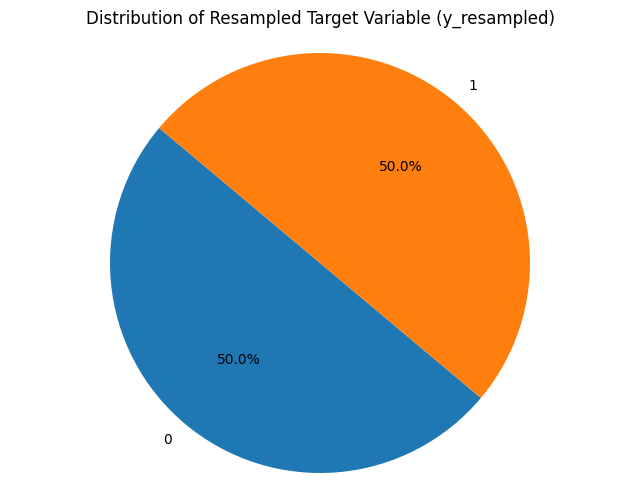

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate the counts of each unique value in y_resampled
unique_values, value_counts = np.unique(y_resampled, return_counts=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=unique_values, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Resampled Target Variable (y_resampled)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
X,y=X_resampled, y_resampled

# Model training

Logistic Regression

In [ ]:
endo_encoded.dropna(inplace=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)
classifier=LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)
classifier=LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cv_scores = cross_val_score(classifier, x_train, y_train, cv=3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cross Validation Scores:", cv_scores)

Precision: 1.0
Recall: 0.9615384615384616
F1 Score: 0.9803921568627451
Cross Validation Scores: [0.95744681 0.9787234  1.        ]


In [ ]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score3a = accuracy_score(y_test, y_pred)
print(score3a)

[[34  0]
 [ 1 25]]
0.9833333333333333


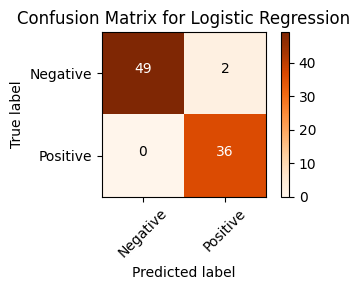

In [ ]:
mtp.figure(figsize=(4, 3))
mtp.imshow(cm, interpolation='nearest', cmap=mtp.cm.Oranges)
mtp.title('Confusion Matrix for Logistic Regression')
mtp.colorbar()

classes = ['Negative', 'Positive']
tick_marks = nm.arange(len(classes))
mtp.xticks(tick_marks, classes, rotation=45)
mtp.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        mtp.text(j, i, str(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black')

mtp.ylabel('True label')
mtp.xlabel('Predicted label')
mtp.tight_layout()
mtp.show()

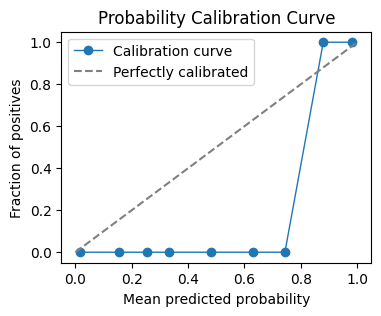

In [ ]:
from sklearn.calibration import calibration_curve
prob_pos = classifier.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
mtp.figure(figsize=(4, 3))
mtp.plot(mean_predicted_value, fraction_of_positives, marker='o', linewidth=1, label='Calibration curve')
mtp.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
mtp.xlabel('Mean predicted probability')
mtp.ylabel('Fraction of positives')
mtp.title('Probability Calibration Curve')
mtp.legend()
mtp.show()


In [ ]:
from sklearn.metrics import brier_score_loss

# Assuming y_true is your true labels and y_prob is your predicted probabilities
brier_score = brier_score_loss(y_test, y_pred)
print("Brier Score:", brier_score)


Brier Score: 0.022988505747126436


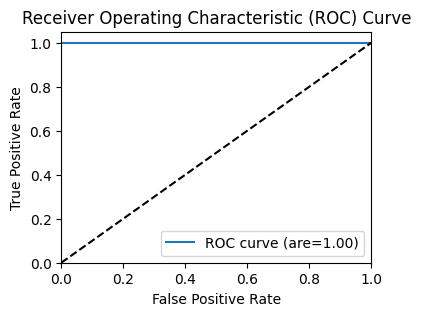

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_test_flat=y_test.ravel()
y_prob=classifier.predict_proba(x_test)
fpr, tpr, thresholds=roc_curve(y_test_flat,y_prob[:,1])
mtp.figure(figsize=(4,3))
mtp.plot(fpr,tpr,label='ROC curve (are=%0.2f)'%roc_auc_score(y_test_flat,y_prob[:,1]))
mtp.plot([0, 1], [0, 1], 'k--')
mtp.xlim([0.0, 1.0])
mtp.ylim([0.0, 1.05])
mtp.xlabel('False Positive Rate')
mtp.ylabel('True Positive Rate')
mtp.title('Receiver Operating Characteristic (ROC) Curve')
mtp.legend(loc="lower right")
mtp.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cv_scores = cross_val_score(classifier, x_train, y_train, cv=3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cross Validation Scores:", cv_scores)


Precision: 0.9473684210526315
Recall: 1.0
F1 Score: 0.972972972972973
Cross Validation Scores: [1.         0.98837209 1.        ]


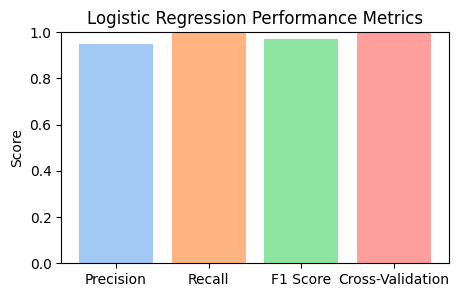

In [ ]:
scores = [precision, recall, f1, cv_scores.mean()]
score_names = ['Precision', 'Recall', 'F1 Score', 'Cross-Validation']
palette = sns.color_palette('pastel')
mtp.figure(figsize=(5, 3))
mtp.bar(score_names, scores, color=palette)
mtp.ylabel('Score')
mtp.title('Logistic Regression Performance Metrics')
mtp.ylim(0, 1)  # Set y-axis limit to 0-1
mtp.show()

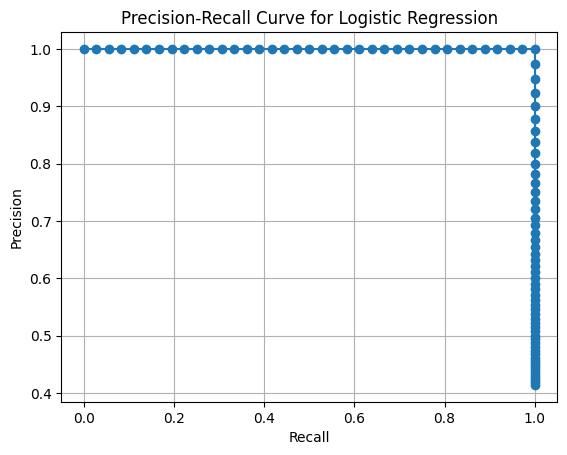

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the classifier on your data

# Assuming your data is already split into X_train and y_train
clf.fit(x_train, y_train)

# Predict probabilities on the testing data
y_scores = clf.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.grid(True)
plt.show()


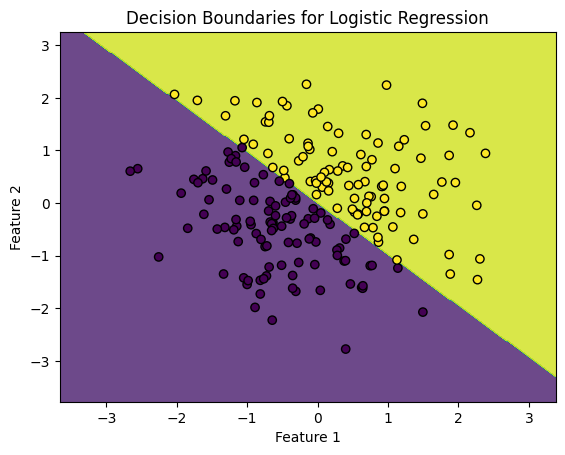

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a sample dataset
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Create a Logistic Regression Classifier
clf = LogisticRegression()
clf.fit(X, y)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Logistic Regression')
plt.show()
